#  Classificação KNN

O KNN é um dos algoritmos mais simples para Machine Learning, sendo um algoritmo do tipo "lazy", ou seja, nenhuma computação é realizada no dataset até que um novo ponto de dado seja alvo de teste.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("logi1.xlsx")
df.head()

,Score,Accepted
0,982,0
1,1304,1
2,1256,1
3,1562,1
4,703,0


In [3]:
len(df)

42

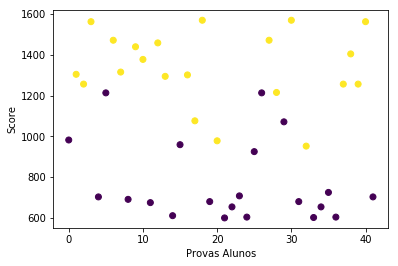

In [4]:
plt.scatter(df.index, df['Score'], c = df['Accepted'].astype('category').cat.codes)
plt.xlabel('Provas Alunos')
plt.ylabel('Score')
plt.show()

### Preparação do dados

In [5]:
X = df["Score"].values.reshape(-1, 1)
y = df["Accepted"]

In [6]:
print(X[:3])
print(y[:3])

[[ 982]
 [1304]
 [1256]]
0    0
1    1
2    1
Name: Accepted, dtype: int64


### Aplicacao do modelo

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
modelo = KNeighborsClassifier(n_neighbors=5)

In [9]:
modelo.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## para acessar outras métricas de distância
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [10]:
metricas_distancias = ['euclidean',  'manhattan', 'minkowski', 'chebyshev', 'jaccard', 'hamming']

In [11]:
for metrica in metricas_distancias:
    modelo = KNeighborsClassifier(n_neighbors=5, metric=metrica)
    modelo.fit(X,y)
    print(metrica, sum(modelo.predict(X) == y) / len(X))

euclidean 0.8809523809523809
manhattan 0.8809523809523809
minkowski 0.8809523809523809
chebyshev 0.8809523809523809
jaccard 0.5
hamming 0.7380952380952381


In [12]:
modelo = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
modelo.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### uso do modelo

#### modelo.predict()  retornará 1 ou 0 – (Accepted or Not)

In [13]:
modelo.predict(1200)

array([1])

In [14]:
modelo.predict_proba(1200) # (40% de chance de não ser Aceito(0), 60% chance de ser  Aceito(1))

array([[0.4, 0.6]])

In [15]:
modelo.predict(1800)

array([1])

In [16]:
modelo.predict_proba(1800)

array([[0., 1.]])

In [17]:
modelo.predict(550)

array([0])

In [18]:
modelo.predict_proba(1400)

array([[0., 1.]])

In [19]:
modelo.predict_proba(550)

array([[1., 0.]])

## *** KNN - dados do Titanic***

In [20]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
len(df)

891

In [22]:
df['fsex'] = df.apply(lambda row: 0 if row['Sex'] == "male" else 1, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fsex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### pclass- Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
### Survived: 0 = No, 1 = Yes

In [23]:
print("Número de passageiros= ",len(df))

Número de passageiros=  891


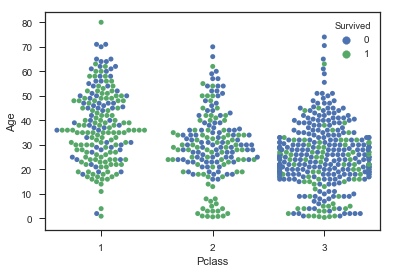

In [24]:
import seaborn as sns
sns.set(style="ticks")

#sns.pointplot(x='Age', y='Pclass', data=df, hue="Survived")
sns.swarmplot(y="Age", x="Pclass", hue="Survived", data=df)

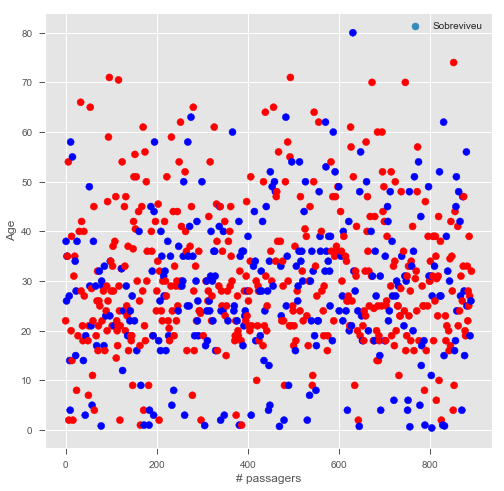

In [27]:
import matplotlib
fig = plt.figure(figsize=(8,8))
plt.style.use('ggplot')

colors = ['red', 'blue']
p = plt.scatter(   df.index, df.Age, c = df['Survived'], 
                cmap=matplotlib.colors.ListedColormap(colors)) #.astype('category').cat.codes);
plt.xlabel('# passagers')
plt.ylabel('Age')
plt.legend(["Sobreviveu", "Não Sobreviveu"])

plt.show()

In [28]:
X = df["Pclass"].values.reshape(-1, 1)
y = df["Survived"]

In [29]:
modelo = KNeighborsClassifier(n_neighbors=5)

In [30]:
modelo.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
# sobrevivente na 2a Classe
modelo.predict(2)

array([0])

In [32]:
# sobrevivente na 2a Classe
modelo.predict_proba(2)

array([[0.8, 0.2]])

In [33]:
# modelo 2 - com idade
import numpy as np

In [34]:
# remover valores missing de idade- nan
df = df[df.Age != np.NaN]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fsex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [35]:
len(df)

891

## remover valores missing - nan

In [36]:
df = df.dropna(axis=0, how='any')
len(df)

183

In [37]:
X = df["Age"].values.reshape(-1, 1)
y = df["Survived"]

In [38]:
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
modelo.predict(30)

array([1])

In [40]:
modelo.predict_proba(30)

array([[0.4, 0.6]])

In [41]:
modelo.predict_proba(10)

array([[0., 1.]])

In [42]:
modelo.predict(50)

array([0])

In [43]:
modelo.predict_proba(50)

array([[0.6, 0.4]])

In [44]:
modelo.predict_proba(60)

array([[0.6, 0.4]])

In [ ]:
# modelo 3 - fare (valor do ticket)

In [45]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
X = df["Fare"].values.reshape(-1, 1)
y = df["Survived"]

In [48]:
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
modelo.predict(10)

array([0])

In [50]:
modelo.predict_proba(10)

array([[0.8, 0.2]])

In [51]:
valor = 200 # 56
print(modelo.predict(valor), modelo.predict_proba(valor))

[1] [[0.4 0.6]]


In [53]:
# valor pago do ticket do titatic
valores = [10, 30, 50, 70, 100, 200, 300, 400, 512 ]
for valor in valores:
    previsao = modelo.predict(valor)
    if previsao == 0:
        passageiro = "Morrer"
    else:
        passageiro = "Sobreviver"
        
    print("$",valor,passageiro, modelo.predict_proba(valor)[0])

$ 10 Morrer [0.8 0.2]
$ 30 Sobreviver [0.2 0.8]
$ 50 Morrer [0.6 0.4]
$ 70 Morrer [1. 0.]
$ 100 Sobreviver [0.2 0.8]
$ 200 Sobreviver [0.4 0.6]
$ 300 Sobreviver [0.4 0.6]
$ 400 Sobreviver [0.2 0.8]
$ 512 Sobreviver [0.2 0.8]


### fim

## Normalizar os dados (Usar mais de uma variável preditora)

In [54]:
df = pd.read_excel("dados.xlsx")
df

,Altura,Peso,Salario
0,1.77,90,10000
1,1.52,51,990
2,1.62,57,2000
3,1.82,95,3000
4,1.55,53,1200
5,1.93,100,5000


### Normalizacao de dados - forma 1

In [55]:
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm

,Altura,Peso,Salario
0,0.166667,0.319728,0.699408
1,-0.443089,-0.476190,-0.300592
2,-0.199187,-0.353741,-0.188494
3,0.288618,0.421769,-0.077506
4,-0.369919,-0.435374,-0.277284
5,0.556911,0.523810,0.144469


### Normalizacao de dados - forma 2

In [56]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = ["Altura", "Peso", "Salario"]
df_normalized

,Altura,Peso,Salario
0,0.609756,0.795918,1.000000
1,0.000000,0.000000,0.000000
2,0.243902,0.122449,0.112098
3,0.731707,0.897959,0.223085
4,0.073171,0.040816,0.023307
5,1.000000,1.000000,0.445061


## fim

# dataset Iris (plantas)

/Users/vladimiralencar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


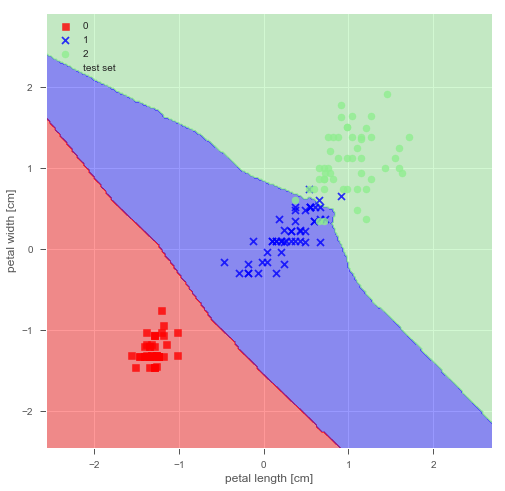

In [57]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())



   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)
fig = plt.figure(figsize=(8,8))
plt.style.use('ggplot')

plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [58]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [59]:
iris = pd.read_csv('Iris.csv')

In [60]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
iris['Species'] = iris['Species'].astype('category')

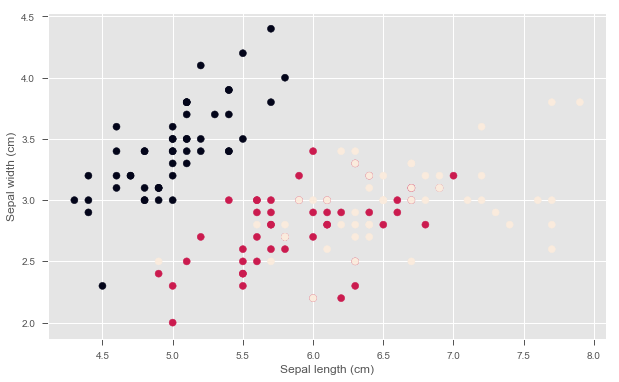

In [63]:
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c = iris['Species'].astype('category').cat.codes);
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)');

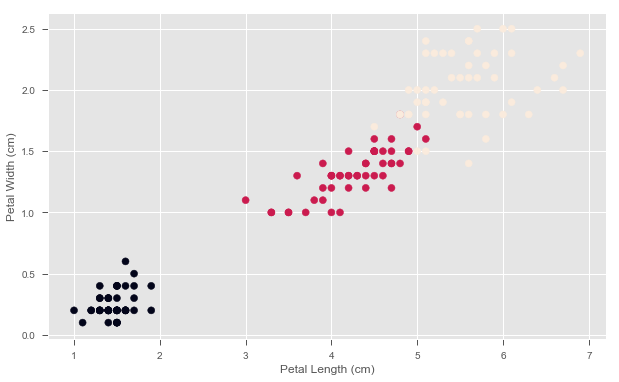

In [64]:
fig = plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'], c = iris['Species'].astype('category').cat.codes)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)');

In [65]:
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='minkowski')
model = knn

In [66]:
mask = np.random.rand(len(iris)) <= 0.8

train = iris[mask]
test = iris[~mask]

In [67]:
X_train = train.drop('Species', axis = 1).drop('Id', axis = 1)
y_train = train['Species']

In [68]:
X_test = test.drop('Species', axis = 1).drop('Id', axis = 1)
y_test = test['Species']

In [69]:
X_train[:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [70]:
model.fit(X_train, y_train); 

In [71]:
prediction = model.predict(X_test)

In [72]:
prediction[:3]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [73]:
import sklearn.metrics as metrics

metrics.confusion_matrix(y_true = y_test, y_pred = prediction)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  1,  3]])

In [74]:
metrics.accuracy_score(y_true = y_test, y_pred = prediction)

0.9666666666666667

In [75]:
len(X_train)

120

In [76]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [77]:
model.effective_metric_

'euclidean'